# Interpolation

In [3]:
import numpy as np
np.set_printoptions(precision=2, linewidth=65)

import matplotlib.pyplot as plt
plt.rc('figure', dpi=150)

import seaborn as sns
sns.set()
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})


In [6]:
def fkt(x):
    return np.sin(3*x) + 2*x
def fkt_der(x):
    return 3*np.cos(3*x) + 2

In [10]:
x = np.linspace(0, 2, 100)
y = fkt(x)

n = 6

xi = np.linspace(0, 2, n)
yi = fkt(xi)

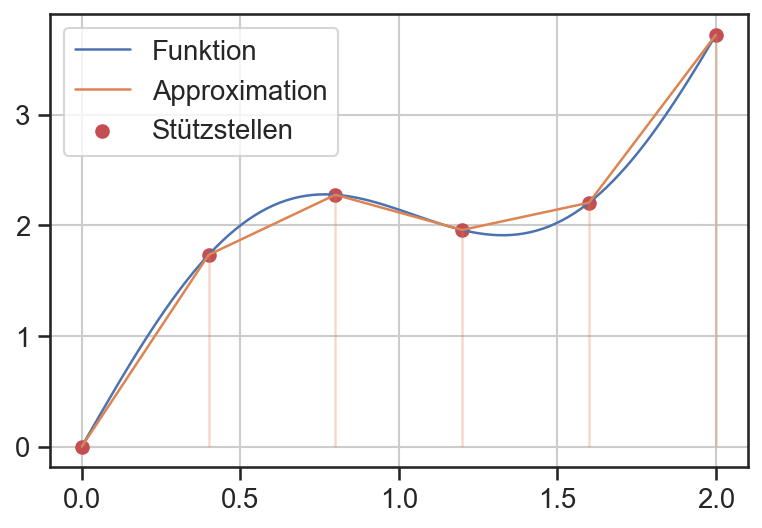

In [23]:
plt.plot(x, y, label='Funktion')
plt.scatter(xi, yi, label='Stützstellen', c='C3')
# plt.step(xi, oben, where='post')
# plt.step(xi, unten, where='post')
plt.plot(xi, yi, label='Approximation', c='C1')

# for cx,cy in zip(xi, yi):
#     plt.axvline(x=cx, ymax=cy, c='C1', alpha=0.3)

plt.vlines(xi, ymin=0, ymax=yi, color='C1', alpha=0.3)

plt.grid()
plt.legend();

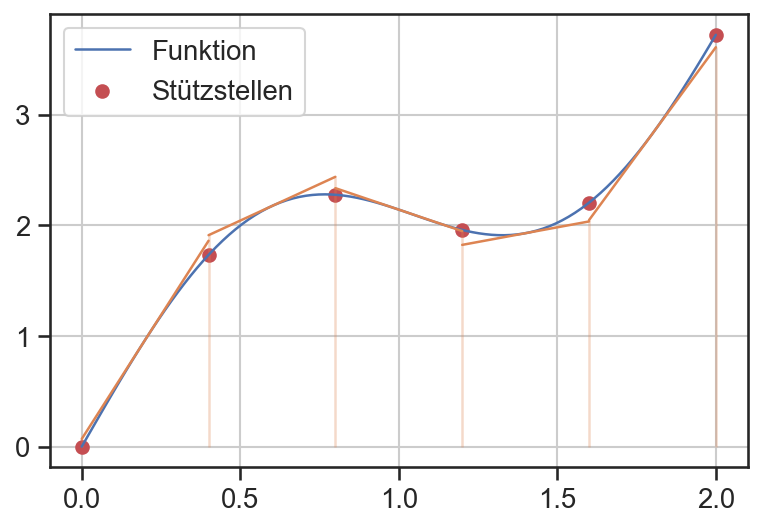

In [32]:
plt.plot(x, y, label='Funktion')
plt.scatter(xi, yi, label='Stützstellen', c='C3')
# plt.step(xi, oben, where='post')
# plt.step(xi, unten, where='post')
# plt.plot(xi, yi, label='Approximation')

tr_ys = []

for i in range(n-1):
    dx = xi[i+1] - xi[i]
    cx = (xi[i] + xi[i+1]) / 2
    cs = fkt_der(cx)
    cy = fkt(cx)
    y1 = cy - dx/2*cs
    y2 = cy + dx/2*cs
    tr_ys.append([y1, y2])
    plt.plot([xi[i], xi[i+1]], [y1, y2], color='C1')

y_max = []
y_max.append(tr_ys[0][0])
for i in range(1, n-1):
    if tr_ys[i][0] > tr_ys[i-1][1]:     
        y_max.append(tr_ys[i][0])
    else:
        y_max.append(tr_ys[i-1][1])
y_max.append(tr_ys[-1][1])

plt.vlines(xi, ymin=0, ymax=y_max, color='C1', alpha=0.3)

plt.grid()
plt.legend();

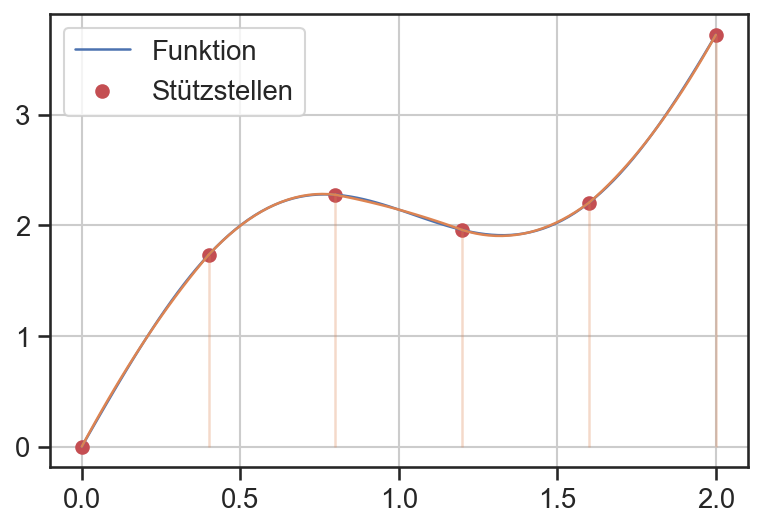

In [36]:
plt.plot(x, y, label='Funktion')
plt.scatter(xi, yi, label='Stützstellen', c='C3')
# plt.step(xi, oben, where='post')
# plt.step(xi, unten, where='post')
# plt.plot(xi, yi, label='Approximation')

for i in range(n-1):
    dx = xi[i+1] - xi[i]
    cx = (xi[i] + xi[i+1]) / 2
    cy = fkt(cx)

    P = np.polyfit([xi[i], cx, xi[i+1]], [yi[i], cy, yi[i+1]], 2)
    
    Px = np.linspace(xi[i], xi[i+1], 20)
    Py = np.polyval(P, Px)
    
    plt.plot(Px, Py, color='C1')

y_max = []
y_max.append(tr_ys[0][0])
for i in range(1, n-1):
    if tr_ys[i][0] > tr_ys[i-1][1]:     
        y_max.append(tr_ys[i][0])
    else:
        y_max.append(tr_ys[i-1][1])
y_max.append(tr_ys[-1][1])

plt.vlines(xi, ymin=0, ymax=yi, color='C1', alpha=0.3)

plt.grid()
plt.legend();